In [1]:
# We try to batch-calculcate indices from a series of images
import sentinel_helpers
from glob import glob

import matplotlib.pyplot as plt
import rasterio as r
import rasterio.plot as plot

In [2]:
downloads = glob('input/raster/*.zip')
downloads

['input/raster/S2A_MSIL2A_20200521T102031_N0214_R065_T32UQC_20200521T115134.zip',
 'input/raster/S2A_MSIL2A_20200528T101031_N0214_R022_T32UQC_20200528T120203.zip',
 'input/raster/S2B_MSIL2A_20200602T100559_N0214_R022_T32UQC_20200602T135324.zip']

## Normalized Burn Ratio

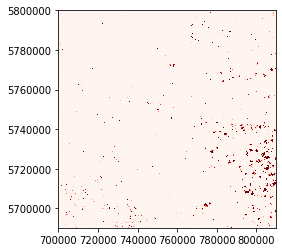

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [12]:
cloud_mask = 'zip+file://' + downloads[0] + '!/S2A_MSIL2A_20200521T102031_N0214_R065_T32UQC_20200521T115134.SAFE/GRANULE/L2A_T32UQC_A025659_20200521T102329/QI_DATA/MSK_CLDPRB_20m.jp2'
cloud_mask = r.open(cloud_mask)

plot.show(cloud_mask, cmap='Reds')
# plot.show_hist(cloud_mask, bins=255)
cloud_mask.read(1) > 30

In [13]:
# sentinel_helpers.band_paths(downloads[0], 'CLDPRB', '20m')

In [16]:
import numpy as np

In [20]:
cloud_mask.read(1) < 30

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

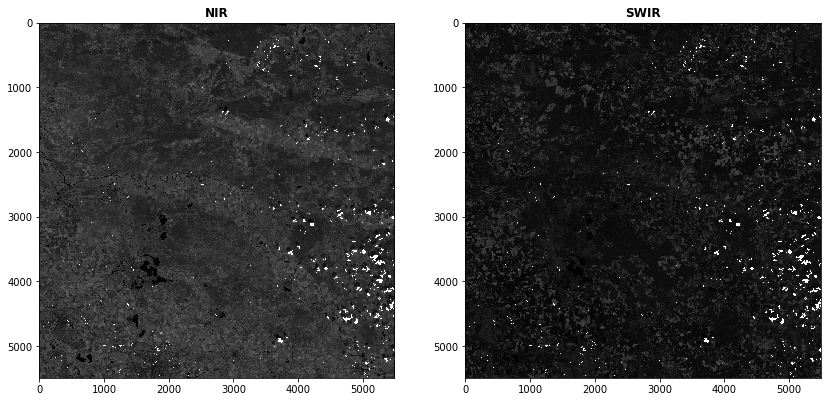

In [44]:
b12, b8a = sentinel_helpers.band_paths(downloads[0], ['B12', 'B8A'], '20m')

with r.open(b12) as b12, r.open(b8a) as b8a:
    fig, (ax8a, ax12) = plt.subplots(1, 2, figsize=(14,7))
    
    # hide the cloud mask
    not_cloudy = cloud_mask.read(1) > 90
    b8a = np.ma.masked_array(b8a.read(1), mask=not_cloudy)
    b12 = np.ma.masked_array(b12.read(1), mask=not_cloudy)
    
    # plot the bands we use for calculation
    plot.show(b8a, ax=ax8a, title='NIR', cmap='gray')
    plot.show(b12, ax=ax12, title='SWIR', cmap='gray')
    plt.show()

In [84]:
?np.ma.masked_greater

In [91]:
b12, b8a = sentinel_helpers.band_paths(downloads[0], ['B12', 'B8A'], '20m')

with r.open(b12) as b12, r.open(b8a) as b8a:
    # hide the cloud mask
    not_cloudy = cloud_mask.read(1) > 90
    
    print(np.unique(b12.dataset_mask()))
    
    #b8a = np.ma.masked_array(b8a.read(1), mask=not_cloudy)
    #b12 = np.ma.masked_array(b12.read(1), mask=not_cloudy)
    
    # cut off outliers
    #b8a.mask = b8a.mask & b8a.data <= np.percentile(b8a, 95)
    #b12.mask = b12.mask & b12.data <= np.percentile(b12, 95)
    
    #nbr = (b8a - b12) / (b8a + b12)
    
    # this prints 0.0 to 2620.52; this is way above what's expected
    #print(np.min(nbr.data), np.max(nbr.data))
    #print([np.percentile(nbr, p) for p in range(0, 101, 10)])
    
    #fig, (axl, axr) = plt.subplots(1, 2, figsize=(14,7))
    #plot.show_hist(nbr.data, bins=10, ax=axl)
    #plot.show(nbr.data, cmap='viridis', ax=axr)
    #plt.show()

[255]


0.0 15642.0
[0.0, 0.0, 767.0, 2098.0, 2706.0, 3260.0, 3793.0, 4350.0, 5023.0, 6284.0, 15642.0]


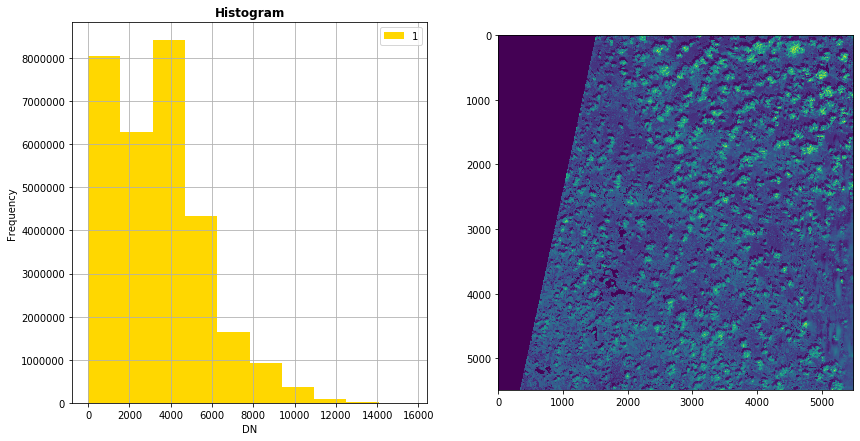

In [89]:
b12, b8a = sentinel_helpers.band_paths(downloads[1], ['B12', 'B8A'], '20m')

with r.open(b12) as b12, r.open(b8a) as b8a:
    # hide the cloud mask
    not_cloudy = cloud_mask.read(1) > 90
    
    b8a = np.ma.masked_array(b8a.read(1), mask=not_cloudy)
    b12 = np.ma.masked_array(b12.read(1), mask=not_cloudy)
    
    # cut off outliers
    b8a.mask = b8a.mask & b8a.data <= np.percentile(b8a, 95)
    b12.mask = b12.mask & b12.data <= np.percentile(b12, 95)
    
    nbr = (b8a - b12) / (b8a + b12)
    
    # this prints 0.0 to 2620.52; this is way above what's expected
    print(np.min(nbr.data), np.max(nbr.data))
    print([np.percentile(nbr, p) for p in range(0, 101, 10)])
    
    fig, (axl, axr) = plt.subplots(1, 2, figsize=(14,7))
    plot.show_hist(nbr.data, bins=10, ax=axl)
    plot.show(nbr.data, cmap='viridis', ax=axr)
    plt.show()

0.0 15545.0
[0.0, 0.0, 1795.0, 2202.0, 2523.0, 2856.0, 3162.0, 3487.0, 3876.0, 4356.0, 15545.0]


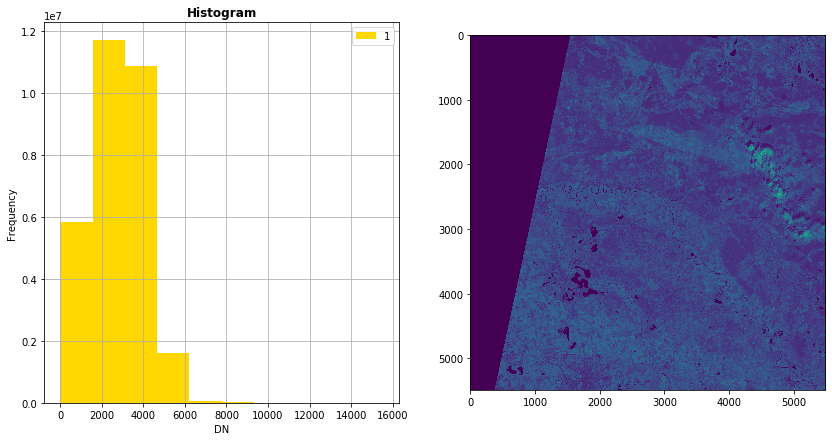

In [90]:
b12, b8a = sentinel_helpers.band_paths(downloads[2], ['B12', 'B8A'], '20m')

with r.open(b12) as b12, r.open(b8a) as b8a:
    # hide the cloud mask
    not_cloudy = cloud_mask.read(1) > 90
    
    b8a = np.ma.masked_array(b8a.read(1), mask=not_cloudy)
    b12 = np.ma.masked_array(b12.read(1), mask=not_cloudy)
    
    # cut off outliers
    b8a.mask = b8a.mask & b8a.data <= np.percentile(b8a, 95)
    b12.mask = b12.mask & b12.data <= np.percentile(b12, 95)
    
    nbr = (b8a - b12) / (b8a + b12)
    
    # this prints 0.0 to 2620.52; this is way above what's expected
    print(np.min(nbr.data), np.max(nbr.data))
    print([np.percentile(nbr, p) for p in range(0, 101, 10)])
    
    fig, (axl, axr) = plt.subplots(1, 2, figsize=(14,7))
    plot.show_hist(nbr.data, bins=10, ax=axl)
    plot.show(nbr.data, cmap='viridis', ax=axr)
    plt.show()